# Car insurance Claim prediction

This notebook is made for studying binary classification using logistic regression model from scikit-learn.

The dataset used in this notebook is from https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification?select=train.csv provided by IFTESHA NAJNIN.

The objective is to predict whether the policy holder will file a claim or not in 6 months

### Importing necessary libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold

%matplotlib inline

In [2]:
train_df = pd.read_csv("archive/train.csv")
test_df = pd.read_csv("archive/test.csv")

### Inspection of train dataset's head

In [3]:
print(train_df.shape)
train_df.head(10)

(58592, 44)


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


### Checking the datatypes

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

### Checking for missing values

<AxesSubplot: >

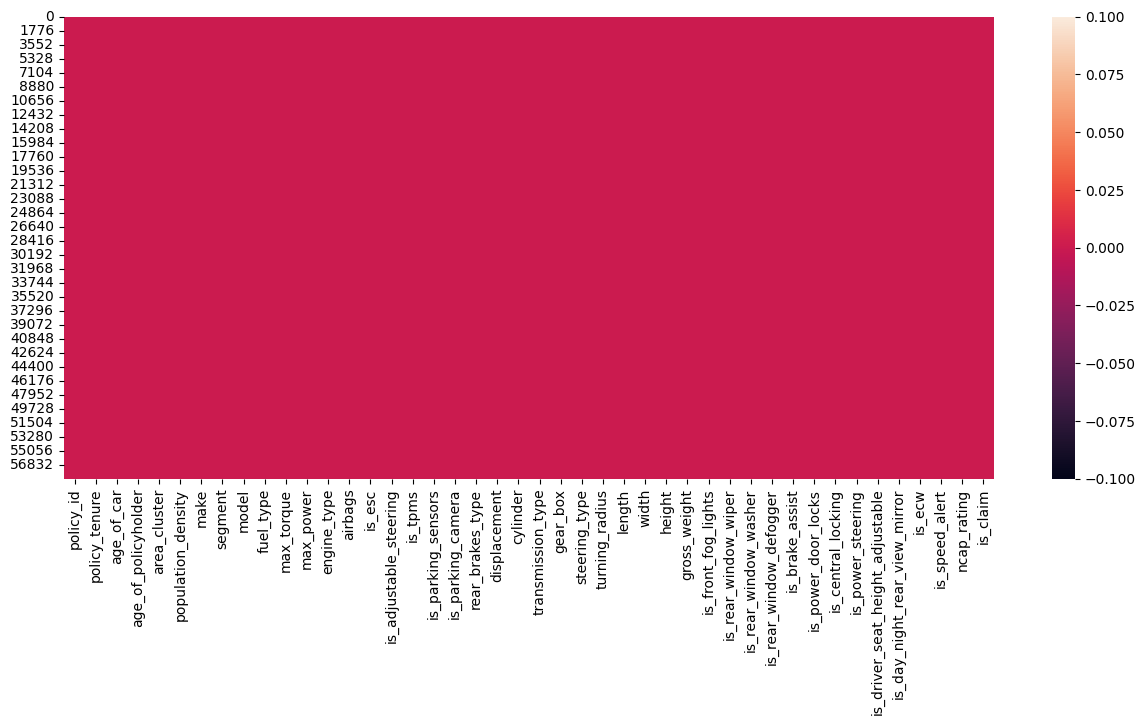

In [5]:
plt.figure(figsize = (15,6))
sns.heatmap(train_df.isna())

In [6]:
train_df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [7]:
y_train = train_df["is_claim"]
train_df.drop("is_claim", axis = 1, inplace = True)
print(y_train.head())

0    0
1    0
2    0
3    0
4    0
Name: is_claim, dtype: int64


### Dealing with boolean columns to have numeric values

In [8]:
train_df = train_df.set_index("policy_id")
test_df = test_df.set_index("policy_id")

In [9]:
col_with_is_train = train_df.columns[train_df.columns.str.contains("is_")]
col_with_is_test = test_df.columns[test_df.columns.str.contains("is_")]
print(col_with_is_train)

Index(['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')


In [10]:
train_df_bool = train_df[col_with_is_train]
test_df_bool = test_df[col_with_is_test]
train_df.drop(col_with_is_train, axis = 1, inplace = True)
test_df.drop(col_with_is_test, axis = 1, inplace = True)

train_df_bool.head()

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
policy_id,,,,,,,,,,,,,,,,,
ID00001,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes
ID00002,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes
ID00003,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes
ID00004,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
ID00005,No,No,No,No,Yes,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes


In [11]:
train_df_bool = pd.DataFrame(np.where(train_df_bool == 'Yes', 1, 0), index = train_df_bool.index,
                            columns = train_df_bool.columns)
test_df_bool = pd.DataFrame(np.where(test_df_bool == 'Yes', 1, 0), index = test_df_bool.index,
                            columns = test_df_bool.columns)
train_df_bool.head()

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
policy_id,,,,,,,,,,,,,,,,,
ID00001,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
ID00002,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
ID00003,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
ID00004,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1
ID00005,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1


### Extract categorical variables

In [12]:
train_df['make'] = train_df['make'].astype('object')
test_df['make'] = test_df['make'].astype('object')

In [13]:
train_df_cat = train_df.select_dtypes(include=['object'])
test_df_cat = test_df.select_dtypes(include=['object'])
train_df_cat.head(5)

,area_cluster,make,segment,model,fuel_type,max_torque,max_power,engine_type,rear_brakes_type,transmission_type,steering_type
policy_id,,,,,,,,,,,
ID00001,C1,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power
ID00002,C2,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power
ID00003,C3,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power
ID00004,C4,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Drum,Automatic,Electric
ID00005,C5,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,Drum,Automatic,Electric


In [14]:
train_df_cat_nunique = list(map(lambda col: train_df_cat[col].nunique(), train_df_cat.columns))
d = dict(zip(train_df_cat.columns, train_df_cat_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('rear_brakes_type', 2),
 ('transmission_type', 2),
 ('fuel_type', 3),
 ('steering_type', 3),
 ('make', 5),
 ('segment', 6),
 ('max_torque', 9),
 ('max_power', 9),
 ('model', 11),
 ('engine_type', 11),
 ('area_cluster', 22)]

In [15]:
train_df_cat = pd.get_dummies(train_df_cat, drop_first = True)
test_df_cat = pd.get_dummies(test_df_cat, drop_first = True)

/var/folders/j1/xhx1rv6n1g53g2tjrfmrknz00000gn/T/ipykernel_37880/3800211247.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  train_df_cat = pd.get_dummies(train_df_cat, drop_first = True)
/var/folders/j1/xhx1rv6n1g53g2tjrfmrknz00000gn/T/ipykernel_37880/3800211247.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  test_df_cat = pd.get_dummies(test_df_cat, drop_first = True)


In [16]:
train_df = train_df.select_dtypes(exclude=['object'])
test_df = test_df.select_dtypes(exclude=['object'])
train_df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
policy_id,,,,,,,,,,,,,,
ID00001,0.515874,0.05,0.644231,4990,2,796,3,5,4.6,3445,1515,1475,1185,0
ID00002,0.672619,0.02,0.375000,27003,2,796,3,5,4.6,3445,1515,1475,1185,0
ID00003,0.841110,0.02,0.384615,4076,2,796,3,5,4.6,3445,1515,1475,1185,0
ID00004,0.900277,0.11,0.432692,21622,2,1197,4,5,4.8,3995,1735,1515,1335,2
ID00005,0.596403,0.11,0.634615,34738,2,999,3,5,5.0,3731,1579,1490,1155,2


## Combine everything back together

In [17]:
X_train = pd.concat([train_df, train_df_cat, train_df_bool], axis = 1,
                    keys = 'policy_id',
                   verify_integrity = True)
X_test = pd.concat([test_df, test_df_cat, test_df_bool], axis = 1,
                    keys = 'policy_id',
                   verify_integrity = True)

In [18]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(random_state=42, sampling_strategy=0.8)
X_train, y_train = os.fit_resample(X_train, y_train)

In [19]:
X_train_fit, X_train_test, y_train_fit, y_train_test = train_test_split(X_train, y_train, test_size = 0.2,
                                                                       random_state = 5,
                                                                       stratify = y_train)

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train_fit, y_train_fit)
y_pred_probs = pd.DataFrame(logreg.predict_proba(X_train_test)[:,1], index=X_train_test.index)
y_pred_probs.columns = ['predicted probability']

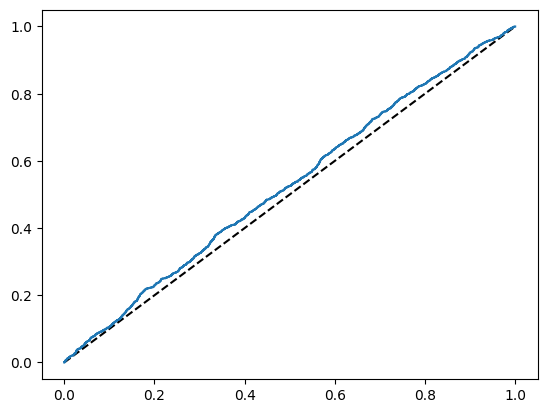

0.5251951433189468


In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train_test, y_pred_probs)
# thresholds is decreasing from max(y_pred_probs) to 0 in order to check fpr, tpr for each thresholds.
# The first element in thresholds is max(y_pred_probs) + 1

plt.plot([0, 1], [0,1], 'k--') #plot straight line x=y for comparison
plt.plot(fpr, tpr) #plot True Positive Rate vs. False Positive Rate
plt.show()

print(roc_auc_score(y_train_test, y_pred_probs))

In [41]:
scaler = StandardScaler()
rfc = RandomForestClassifier()
pipeline = make_pipeline(scaler, rfc)

In [44]:
param_grid = {"randomforestclassifier__max_depth":np.arange(1, 20, 2),
			"randomforestclassifier__n_estimators":np.arange(20, 201, 30)}
			

rfc_cv = RandomizedSearchCV(pipeline, param_grid,
                        scoring = 'accuracy', cv=5)

rfc_cv.fit(X_train_fit, y_train_fit)
print(rfc_cv.best_params_, rfc_cv.best_score_)
best_model_rfc = rfc_cv.best_estimator_

{'randomforestclassifier__n_estimators': 80, 'randomforestclassifier__max_depth': 19} 0.9202532446976891


In [48]:
y_pred_cv = best_model_rfc.predict(X_train_test)
accuracy_score(y_train_test, y_pred_cv)

0.9289404376012966

In [47]:
confusion_matrix(y_train_test, y_pred_cv)

array([[9739, 1230],
       [ 173, 8602]])

In [65]:
y_pred_test = rfc.predict(X_test)
submission = pd.DataFrame({'policy_id':X_test.index, 'is_claim':y_pred_test})
print(submission.head(10))
submission.to_csv('submission.csv', index=None)

  policy_id  is_claim
0   ID58593         1
1   ID58594         0
2   ID58595         0
3   ID58596         0
4   ID58597         0
5   ID58598         0
6   ID58599         1
7   ID58600         0
8   ID58601         0
9   ID58602         0


In [94]:
import xgboost as xgb

model = xgb.XGBClassifier() 

param_grid = { 
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [0, 0.5, 1, 5],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [0, 0.5, 1, 5],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "objective": ["binary:logistic"], "eval_metric": ["error"]
    }

xgb_cv = RandomizedSearchCV(model, param_grid,
                        scoring = 'recall', cv=5)

xgb_cv.fit(X_train_fit, y_train_fit)
print(xgb_cv.best_params_, rfc_cv.best_score_)
best_model_xgb = xgb_cv.best_estimator_

{'reg_lambda': 0, 'reg_alpha': 5, 'objective': 'binary:logistic', 'learning_rate': 0.3, 'eval_metric': 'error', 'colsample_bytree': 0.5} 0.9202532446976891


In [95]:
best_model_xgb.fit(X_train_fit, y_train_fit, 
          eval_set = [(X_train_test, y_train_test)],
         verbose = 0)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [96]:
y_pred_xgb = best_model.predict(X_train_test)
print(accuracy_score(y_train_test, y_pred_xgb))
confusion_matrix(y_train_test, y_pred_xgb)

0.7662074554294975


array([[8524, 2445],
       [2171, 6604]])

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2,
							   criterion='gini', 
							   random_state = 23)

# let dt be a decision stump model
adb_clf = AdaBoostClassifier(estimator = dt,
							n_estimators = 100)

adb_clf.fit(X_train_fit, y_train_fit)

# this example binary classification 
y_pred_proba = adb_clf.predict_proba(X_train_test)[:,1]
y_pred_ada = adb_clf.predict(X_train_test)

score = roc_auc_score(y_train_test, y_pred_proba)
print(score)
confusion_matrix(y_train_test, y_pred_ada)

0.7489072571523114


array([[7890, 3079],
       [3356, 5419]])